### **Basic GUIDE**

In [1]:
import rodin

The `Rodin` class requires two data files: a features table and a class labels file.

1. **Features File**:
   - The first two columns must represent 'mass to charge' ratios and 'retention times' values, respectively.
   - All subsequent columns should contain the intensities. 


2. **Class Labels File**:
   - The first column should contain sample IDs. These IDs must correspond to the names of the columns in the features table.
   - Additional columns in the class labels file represent the classes of the samples, such as treatment groups, age, etc. The names of these columns are not fixed.

To create an object of the `Rodin` class using these files, use the following command:


In [2]:
obj=rodin.create_object_csv("./data/features.csv","./data/class_labels.csv",
                            feat_sep=',',class_sep=',')

Once the `Rodin` object is created, it has three attributes:

1. `X`: This attribute holds the intensities data from the samples.

2. `features`: This contains the metabolites features data, including 'mass to charge' ratios and 'retention times'.

3. `samples`: This attribute includes the classes data, which correspond to various characteristics of the samples such as treatment groups, age, etc.

In [3]:
print(obj.samples)

   Sample ID     Dose     Sex
0        N10  Control  Female
1         H3     High  Female
2        N23  Control  Female
3        N21  Control  Female
4         H9     High  Female
..       ...      ...     ...
66       H15     High    Male
67       H16     High    Male
68       H21     High    Male
69       H27     High    Male
70       H22     High    Male

[71 rows x 3 columns]


<br>
The `transform` function offers a convenient method for preprocessing data, comprising several key steps:

1. **Imputation**: Fills in missing data points within the dataset.

2. **Filtering Features**: Eliminates features that have more than a specified threshold of missing values. This step ensures the quality and reliability of the dataset by removing less informative features.

3. **Data Normalization**: Normalizes the data using one of two methods:
   - **Quantile Normalization**: Adjusts the distributions of intensities across samples to be more similar.
   - **Total Intensity Normalization**: Divides each value in a column by the sum of values in that column,
      normalizing the data based on the total intensity of each feature.

4. **Log2 Transformation**: Applies a log2 transformation to the normalized data. This transformation is useful for stabilizing variance across the dataset and making the data more suitable for linear models and other statistical analyses.

These preprocessing steps are crucial for preparing the data for further analysis, ensuring that it is clean, normalized, and ready for accurate and meaningful interpretation.


In [4]:
obj.transform(thresh=0.5,norm='q')

Number of features filtered: 1972


< Rodin object > 
dim: 24233 X 71

After the data in the `X` attribute has been transformed, statistical tests can be performed. In this basic guide, we will focus on using one-way ANOVA (Analysis of Variance).

- **One-way ANOVA**: This statistical test is used to determine whether there are any statistically significant differences between the means of three or more independent groups. 

To perform one-way ANOVA using the `Rodin` class:
1. Provide a column from the `samples` attribute as an argument. This column should represent the different groups or classes among your samples.
2. Run the function designated for performing ANOVA.

Following the execution of one-way ANOVA, the `features` attribute of the `Rodin` object will be updated. It will now include data about the statistical tests performed. The `p_adj` column displays the p-values adjusted using the Benjamini-Hochberg method.


In [5]:
obj.oneway_anova('Dose')

,mz,time,p_value(owa) Dose,p_adj(owa) Dose
0,85.0284,38.3,4.113913e-01,5.525192e-01
1,85.0285,213.1,3.088595e-03,2.654110e-02
2,85.0285,213.1,9.725732e-01,9.795663e-01
3,85.0285,69.4,9.038740e-01,9.299141e-01
4,85.0285,69.4,8.046424e-03,4.931699e-02
...,...,...,...,...
24228,845.6749,294.9,2.844420e-01,4.436145e-01
24229,845.7611,293.1,2.921493e-09,3.994310e-07
24230,845.8602,287.9,8.848956e-07,5.811294e-05
24231,845.8797,290.9,1.272754e-03,1.485677e-02


The `fold_change` function is recommended  for pathway analysis as it calculates the log fold change difference between classes in the dataset. The function uses the first class appearing in the specified column of the `samples` attribute as the reference.

In [6]:
obj.fold_change('Dose')

,mz,time,p_value(owa) Dose,p_adj(owa) Dose,lfc (Control vs High),lfc (Control vs Low),lfc (Control vs others)
0,85.0284,38.3,4.113913e-01,5.525192e-01,0.015465,1.333126,0.674296
1,85.0285,213.1,3.088595e-03,2.654110e-02,-0.256284,0.576687,0.160201
2,85.0285,213.1,9.725732e-01,9.795663e-01,-0.192466,-0.118744,-0.155605
3,85.0285,69.4,9.038740e-01,9.299141e-01,0.203966,0.391888,0.297927
4,85.0285,69.4,8.046424e-03,4.931699e-02,0.267784,-0.303543,-0.017879
...,...,...,...,...,...,...,...
24228,845.6749,294.9,2.844420e-01,4.436145e-01,-3.605607,-4.144843,-3.875225
24229,845.7611,293.1,2.921493e-09,3.994310e-07,-9.249374,-19.109635,-14.179505
24230,845.8602,287.9,8.848956e-07,5.811294e-05,-5.515928,-16.763752,-11.139840
24231,845.8797,290.9,1.272754e-03,1.485677e-02,-9.025662,-4.351919,-6.688791


The `Rodin` class also offers a convenient way to slice data, enhancing the flexibility and specificity of data analysis. When slicing, for example, by a certain criterion such as p-value in the features table, all main attributes of the `Rodin` object are updated correspondingly. This means that if you slice the features table based on p-value, the `X` attribute (intensities data) will be updated to reflect this change. This feature is particularly useful as it allows for the calculation of principal components on the updated dataset and facilitates the visualization of results with selected features.

Key Analysis Options Post-Slicing:
- **Principal Component Analysis (PCA)**: Once the data is sliced and the `X` attribute is updated, you can perform PCA on this refined dataset to uncover patterns and relationships.
- **Umap and t-SNE**: In addition to PCA, the `Rodin` class supports other visualization techniques like UMAP (Uniform Manifold Approximation and Projection) and t-SNE (t-Distributed Stochastic Neighbor Embedding).


In [7]:
obj_2 = obj[obj.features[obj.features['p_adj(owa) Dose']<0.01]]

In [8]:
obj_2.run_pca()
obj_2.run_umap()

After running dimenional reduction methods n-components will be stored in the class as well in dr attribute

In [9]:
obj_2

< Rodin object > 
dim: 1685 X 71
dr: pca, umap

<Axes: xlabel='umap_1', ylabel='umap_2'>

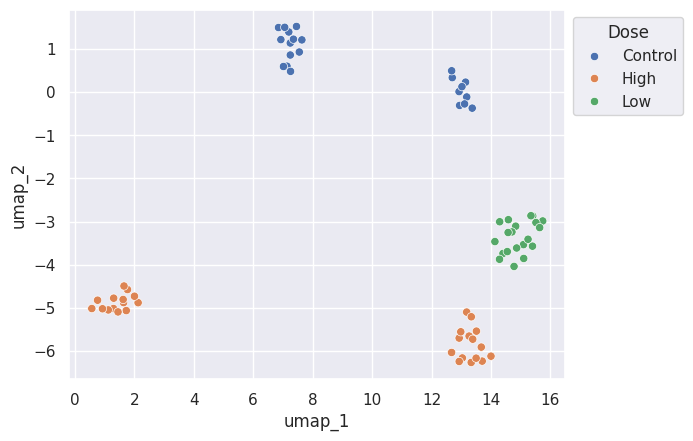

In [10]:
obj_2.plot(dr_name='umap',hue='Dose')

<Axes: xlabel='pca_1', ylabel='pca_2'>

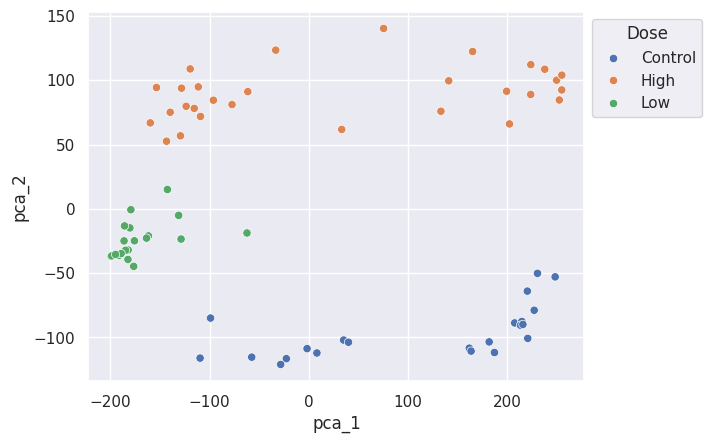

In [11]:
obj_2.plot(dr_name='pca',hue='Dose')

The `Rodin` class incorporates the mummichog algorithm for pathway analysis, which is particularly useful for identifying metabolic pathways in mass spectrometry data.

**Input Requirements**:
- To effectively use the mummichog algorithm, users are required to specify two key columns from the features table:
   - A column with p-values, for instance, `p_adj(owa)`.
   - A column for statistics, where log fold change (LFC) could be used, such as in a comparison like 'Control vs others'.

**Output**:
- The function `analyze_pathways` produces a detailed table containing information about the identified pathways and compounds.
- The results of this analysis are stored in the `uns` attribute of the `Rodin` object. This allows for convenient access and further analysis of the pathway data.

For a comprehensive understanding of the parameters and functionality of the `analyze_pathways` function refer to the dedicated pathways guide.


In [12]:
obj.analyze_pathways('p_adj(owa) Dose','lfc (Control vs others)')

Started @ Wed Dec  6 12:32:17 2023

Read 24233 features as reference list.
Automatically choosing (p < 0.000100) as significant cutoff.
Using 412 features (p < 0.000100) as significant list.

Pathway Analysis...
Query number of significant compounds = 39 compounds
Resampling, 100 permutations to estimate background ...


Got 1656 cpd2mzFeatures
Got 3511 ListOfEmpiricalCompounds
Got 2241 merged ListOfEmpiricalCompounds
Got 1148 final ListOfEmpiricalCompounds
 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100


Pathway background is estimated on 11900 random pathway values


,pathway,overlap_size,pathway_size,p-value,overlap_EmpiricalCompounds (id)
0,Beta-Alanine metabolism,3,15,0.006722124191244433,"E635,E519,E1253"
1,Glutathione Metabolism,3,16,0.007394336610368877,"E519,E286,E705"
2,Purine metabolism,7,86,0.01134358457272498,"E526,E382,E1892,E519,E551,E546,E785"
3,Histidine metabolism,4,36,0.015628938744643307,"E635,E519,E1253,E644"
4,Urea cycle/amino group metabolism,5,66,0.02966137299386606,"E1163,E546,E551,E161,E519"
...,...,...,...,...,...
114,Starch and Sucrose Metabolism,0,17,0.3375346609528611,
115,Trihydroxycoprostanoyl-CoA beta-oxidation,0,1,0.3375346609528611,
116,Omega-6 fatty acid metabolism,0,4,0.3375346609528611,
117,Phytanic acid peroxisomal oxidation,0,7,0.3375346609528611,


In [13]:
obj

< Rodin object > 
dim: 24233 X 71
dr: pca, umap
uns: pathways, compounds

In [14]:
obj.uns['compounds']

,input_row,EID,str_row_ion,compounds,compound_names,m/z,retention_time,p_value,statistic
0,52,E11,M+H[1+],C02218,2-Aminoacrylate; Dehydroalanine,88.0394,74.1,0.879160,0.055963
1,52,E15,M+2H[2+],C00439,N-Formimidoyl-L-glutamate,88.0394,74.1,0.879160,0.055963
2,53,E17,M+2H[2+],C00437,N2-Acetyl-L-ornithine,88.0579,68.0,0.576388,2.318395
3,54,E22,M+H[1+],C00555,4-Aminobutanal; 4-Aminobutyraldehyde; Butyrald...,88.0758,23.8,0.074698,4.696622
4,55,E22,M+H[1+],C00555,4-Aminobutanal; 4-Aminobutyraldehyde; Butyrald...,88.0758,23.8,0.086919,6.959056
...,...,...,...,...,...,...,...,...,...
1801,24103,E2238,M+H[1+],C02737,Phosphatidylserine,836.5505,31.0,0.036482,-6.951723
1802,24117,E2238,M(C13)+H[1+],C02737,Phosphatidylserine,837.5494,29.7,0.787469,-0.808606
1803,24131,E2240,M+H[1+],C00136;C00630,Butanoyl-CoA; Butyryl-CoA$2-Methylpropanoyl-Co...,838.1586,290.7,0.045445,-5.848682
1804,24156,E2241,M+H[1+],C05668,3-Hydroxypropionyl-CoA; 3-Hydroxypropionyl coe...,840.1433,56.8,0.225482,-1.505397


After conducting pathway analysis in the `Rodin` class, users can visualize the results through barplots or violin plots based on Entity IDs (EIDs) of metabolites. By default, these plots will only display statistically significant metabolites, omitting those not meeting the significance threshold. This focused approach ensures clearer and more meaningful visualizations, aiding in the interpretation of the pathway analysis outcomes.

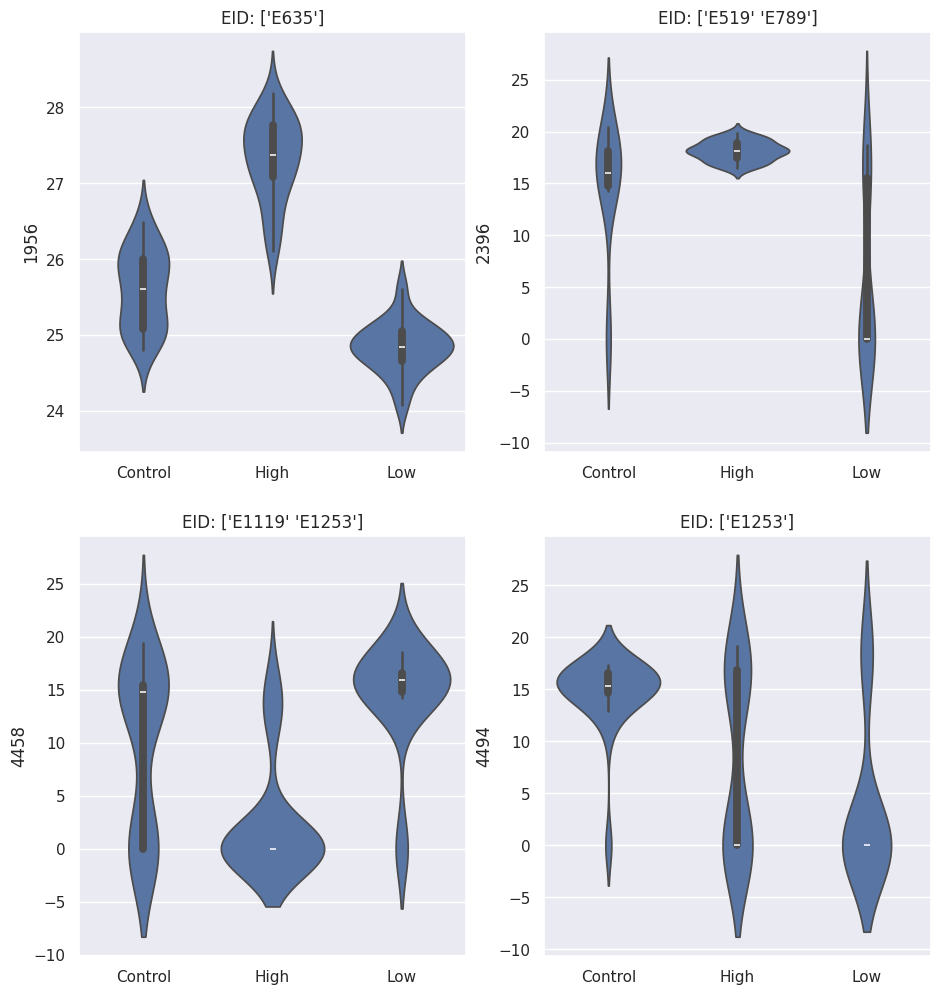

In [15]:
obj.violinplot(eids=['E519','E1253','E635'],grid_dim=(2,2),hue='Dose',figsize=(11,12))

**Saving and Importing Objects in Rodin**

- **Saving the Object**:
  To save the current state of a `Rodin` object, use the `save` method. This method allows you to store the object for future use, preserving all its data and attributes.
  
  ```python
  obj.save('path_to_save')  
  
  
  ``` 
  
- **Importing the Object**:
  If you need to continue working with a previously saved Rodin object, you can easily import it back into your environment using the import_object method. This method reloads the object with all its data and attributes intact.
  ```python
  obj = rodin.import_object('path_to_saved_object')  
  ```
  